In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import linear_model
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from numpy import arange
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
#from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'mdev']
df_housing = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=names) #delim_whitespace=True
#df_test = pd.read_csv('test.csv')

In [3]:
df_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,mdev
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


- `CRIM`: per capita crime rate by town
- `ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`: proportion of non-retail business acres per town.
- `CHAS`: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- `NOX`: nitric oxides concentration (parts per 10 million)
- `RM`: average number of rooms per dwelling
- `AGE`: proportion of owner-occupied units built prior to 1940
- `DIS`: weighted distances to five Boston employment centres
- `RAD`: index of accessibility to radial highways
- `TAX`: full-value property-tax rate per 10,000 (in dollars)
- `PTRATIO`: pupil-teacher ratio by town
- `B`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- `LSTAT`: % lower status of the population
- `MEDV`: Median value of owner-occupied homes in 1000's (in dollars)

In [4]:
df_housing.shape 

(506, 14)

In [5]:
df_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,mdev
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


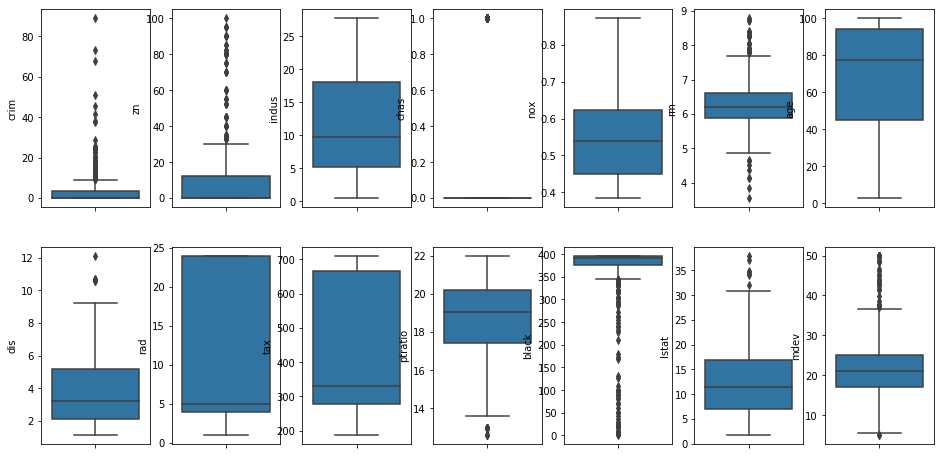

In [6]:
fig, axs = plt.subplots(2, 7, figsize=(16,8))
index = 0
axs = axs.flatten() #The flatten() function is used to get a copy of an given array collapsed into one dimension.
for k, v in df_housing.items():
    sns.boxplot(y=k, data=df_housing, ax=axs[index])
    index += 1


Columns like `CRIM`, `ZN`, `RM`, `B` seems to have outliers. Let's see the outliers percentage in every column. 

In [7]:
for k, v in df_housing.items():   #k = column names
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    IQR = q3 - q1
    v_col = v[(v <= q1 - 1.5 * IQR) | (v >= q3 + 1.5 * IQR)]
    perc = np.shape(v_col)[0] * 100 / np.shape(df_housing)[0] 
    #print("Columns %s Outliers = %.2f%%" %(k, perc))
    print("Outliers For: %s ==> %.2f%%" % (k, perc))

Outliers For: crim ==> 13.04%
Outliers For: zn ==> 13.44%
Outliers For: indus ==> 0.00%
Outliers For: chas ==> 100.00%
Outliers For: nox ==> 0.00%
Outliers For: rm ==> 5.93%
Outliers For: age ==> 0.00%
Outliers For: dis ==> 0.99%
Outliers For: rad ==> 0.00%
Outliers For: tax ==> 0.00%
Outliers For: ptratio ==> 2.96%
Outliers For: black ==> 15.22%
Outliers For: lstat ==> 1.38%
Outliers For: mdev ==> 7.91%


In [8]:
 https://www.kaggle.com/prasadperera/the-boston-housing-dataset

SyntaxError: invalid syntax (<ipython-input-8-d5ee8dcd460d>, line 1)

In [ ]:
df_housing.corr()

In [41]:
mask = np.zeros_like(df_housing.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text yticklabel objects>)

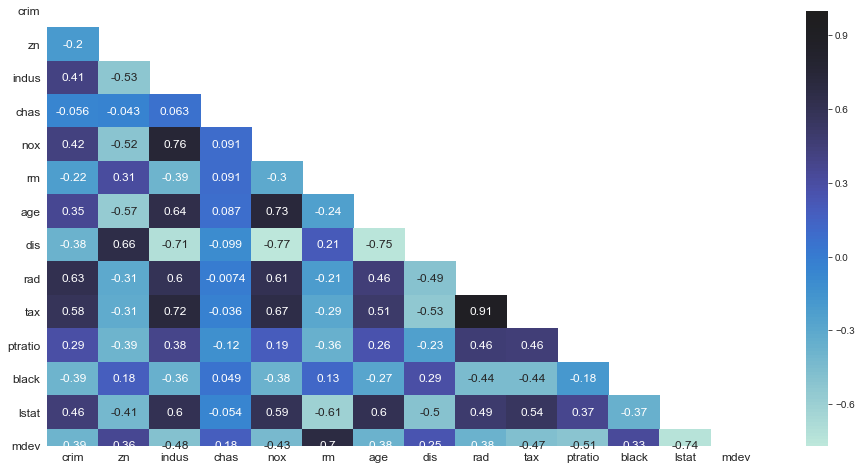

In [42]:
sns.set_style("white")
plt.figure(figsize=(16,8))
sns.heatmap(df_housing.corr(), mask=mask, annot=True, center=True, annot_kws={"size": 12} )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

- Co-relation between TAX and INDUS is 0.76. Higher tax with most industrial areas.
- Heatmap calculations are valid for continuous variable and not for categorical or dummy/discrete variables for example CHAS. 
- Co-relation between TAX and RAD (Radial Highway) is 0.91, which is the highest. RAD is a discrete variable so this is not valid calculation here. So its important to know how individual components are measured and units they are in.
- Lowest co-relation is between MDEV and CHAS which is 0.18. But CHAS is a dummy variable and hence not a valid co-relation measure.
- Lowest co-relation is between INDUS and DIS is -0.71.
- Co-relation does not imply causation.
- Linear relationships only.



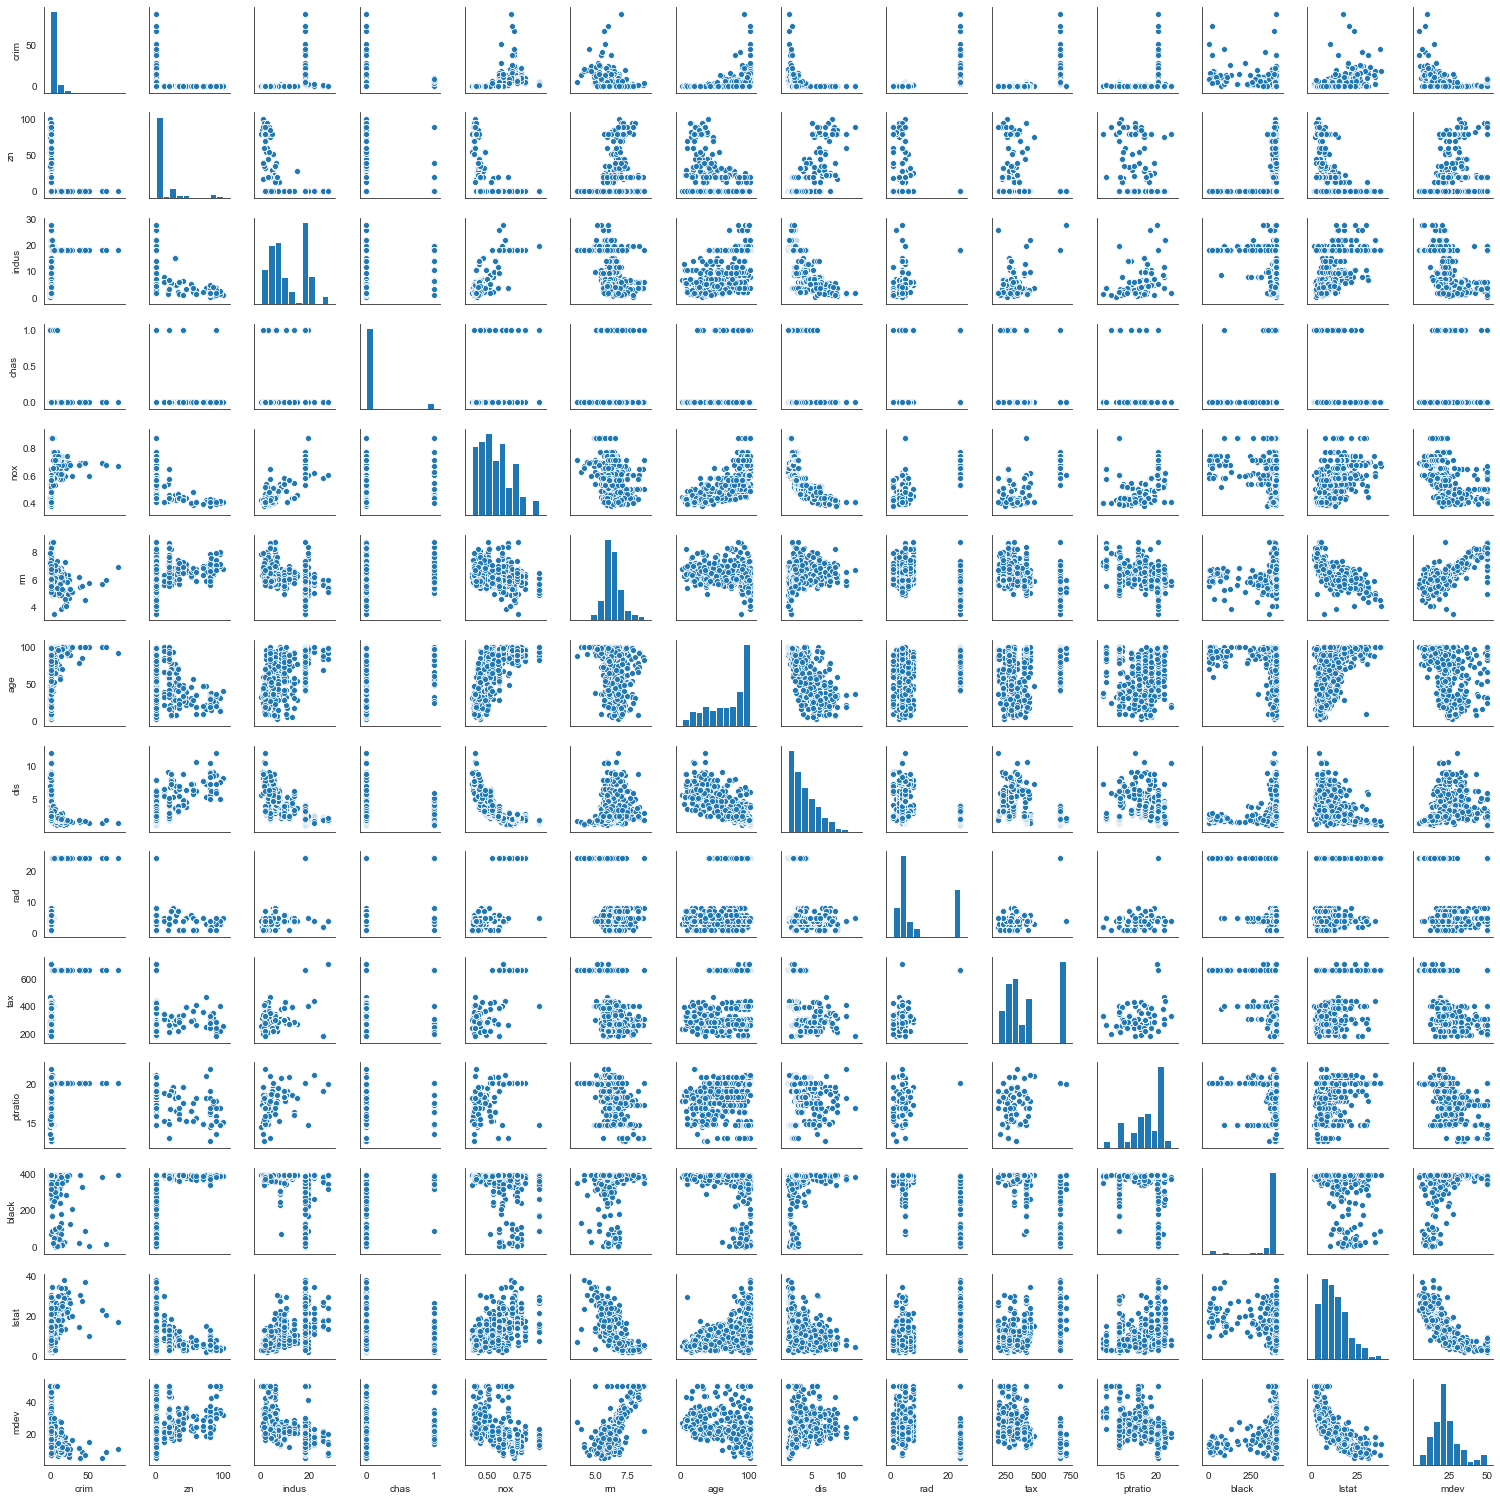

In [10]:
sns.pairplot(df_housing, height=1.5)

In [21]:
df_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,mdev
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
from sklearn.preprocessing import MinMaxScaler

col_names = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age']
X = df_housing[['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age']]
y = df_housing['mdev']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 8), (127, 8), (379,), (127,))

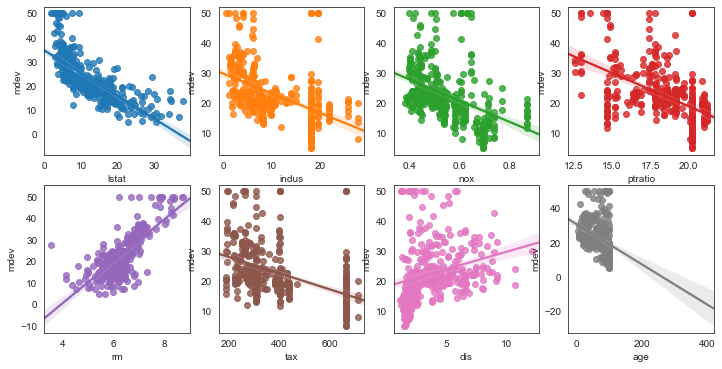

In [55]:
scaler = MinMaxScaler()
#train_df = pd.DataFrame(scaler.fit_transform(X), columns=col_names)
train_df = pd.DataFrame(scaler.fit_transform(X_train), columns=col_names)

fig, axs = plt.subplots(2, 4, figsize=(12,6))
index = 0
axs = axs.flatten()

#for i, k in enumerate(col_names):
 #   sns.regplot(y=y, x=X[k], ax=axs[i])

for i, k in enumerate(X_train):
    sns.regplot(y=y_train, x=X_train[k], ax=axs[i])

In [56]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

### Evaluate Each Algorithm / Models

In [57]:
num_folds = 10 
seed = 7
RMS = 'neg_mean_squared_error'
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f, (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -24.339133, (11.610211)
LASSO: -28.934576, (12.758356)
EN: -30.137191, (12.686319)
KNN: -34.815117, (13.771202)
CART: -25.848696, (13.769809)
SVR: -71.478136, (36.251388)


Compare Algorithms


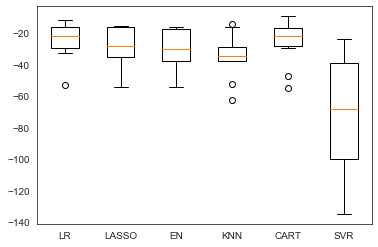

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
print("Compare Algorithms")

### Standardize the Dataset

In [59]:
pipelines = []

pipelines.append(("Scaled_LR", Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(("Scaled_Lasso", Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(("Scaled_EN", Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(("Scaled_KNN", Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(("Scaled_CART", Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(("Scaled_SVR", Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f, (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

Scaled_LR: -24.339133, (11.610211)
Scaled_Lasso: -27.693929, (12.596193)
Scaled_EN: -30.062444, (14.765800)
Scaled_KNN: -16.476788, (15.204516)
Scaled_CART: -26.733113, (13.750270)
Scaled_SVR: -24.927745, (16.093882)


Text(0.5, 0.98, 'Scaled Algorithm Comparison')

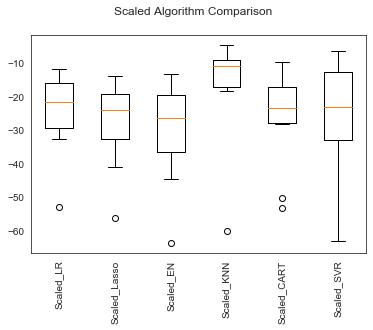

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.suptitle("Scaled Algorithm Comparison")

### KNN Algorithm tuning

In [61]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)

model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best Scoring Parameter Is: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-17.682554 (6.714795) with: {'n_neighbors': 1}
-14.506529 (13.451074) with: {'n_neighbors': 3}
-16.594796 (15.190128) with: {'n_neighbors': 5}
-18.099743 (14.737422) with: {'n_neighbors': 7}
-20.397332 (16.458626) with: {'n_neighbors': 9}
-21.074105 (16.749664) with: {'n_neighbors': 11}
-21.793528 (17.024543) with: {'n_neighbors': 13}
-22.205293 (16.336417) with: {'n_neighbors': 15}
-22.602945 (17.029117) with: {'n_neighbors': 17}
-23.366386 (17.064883) with: {'n_neighbors': 19}
-23.928519 (17.592268) with: {'n_neighbors': 21}
Best Scoring Parameter Is: -14.506529 using {'n_neighbors': 3}


### Ensemble

In [62]:
ensembles = []

ensembles.append(("Scaled_AB", Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(("Scaled_GBM", Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
ensembles.append(("Scaled_RF", Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
ensembles.append(("Scaled_ET", Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled_AB: -16.493975 (11.059452)
Scaled_GBM: -11.216734 (6.238533)
Scaled_RF: -13.655661 (10.586841)
Scaled_ET: -10.355063 (6.615672)


Text(0.5, 1.0, 'Scaled Ensemble Algorithm Comparison')

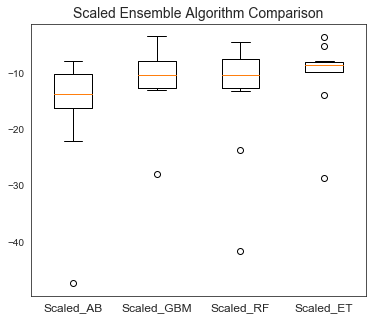

In [63]:
#fig = plt.figure()
#ax = fig.add_subplot(111)

fig, ax = plt.subplots(figsize=(6,5))
plt.boxplot(results)
ax.set_xticklabels(names, fontsize=12)
#fig.suptitle('Scaled Ensemble Algorithm Comparison', fontsize=14)
plt.title('Scaled Ensemble Algorithm Comparison', fontsize=14)

In [67]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_train)
predictions = model.predict(rescaledValidationX)
print("Mean Squared Error", mean_squared_error(y_train, predictions))
print("RMSE", np.sqrt(mean_squared_error(y_train, predictions)))

Mean Squared Error 0.2070569850002022
RMSE 0.4550351469943857


In [65]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print("Mean Squared Error", mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(mean_squared_error(y_test, predictions)))

Mean Squared Error 10.585099767172043
RMSE 3.2534750294373005


In [66]:
predictions=predictions.astype(int)
submission = pd.DataFrame({
        "Org House Price": y_test,
        "Pred House Price": predictions
    })

submission.to_csv("PredictedPrice.csv", index=False)